In [1]:
# Importing libarieries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning 
from sklearn.metrics import r2_score
from fancyimpute import KNN
from sklearn.metrics import mean_squared_error
# Errors
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# importing data
from google.colab import files
uploaded = files.upload()

Saving absenteeism_work.csv to absenteeism_work (3).csv


# EDA

In [3]:
# Read the data
df = pd.read_csv('absenteeism_work.csv',delimiter=';')
display(df.head())
display(df.shape)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


(740, 21)

In [4]:
# Reanme columns 
df = df.rename(columns={'Reason for absence':'absence_reason','Month of absence':'month_absence',
                        'Day of the week':'day_week','Seasons':'seasons','Transportation expense':'transportation_expense',
                        'Distance from Residence to Work':'distance_residence_work',
                        'Service time':'service_time','ID':'id','Age':'age','Work load Average/day':'workload_avg',
                        'Disciplinary failure':'disciplinary_failure','Education':'education','Son' : 'son',
                        'Social drinker':'social_drinker','Social smoker':'social_smoker','Pet':'pet',
                        'Weight':'weight','Height':'height','Body mass index':'bmi','Hit target':'hit_target','Absenteeism time in hours': 'hours'})
                               

In [5]:
df.head()

,id,absence_reason,month_absence,day_week,seasons,transportation_expense,distance_residence_work,service_time,age,Work load Average/day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,bmi,hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [6]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       740 non-null    int64  
 1   absence_reason           740 non-null    int64  
 2   month_absence            740 non-null    int64  
 3   day_week                 740 non-null    int64  
 4   seasons                  740 non-null    int64  
 5   transportation_expense   740 non-null    int64  
 6   distance_residence_work  740 non-null    int64  
 7   service_time             740 non-null    int64  
 8   age                      740 non-null    int64  
 9   Work load Average/day    740 non-null    float64
 10  hit_target               740 non-null    int64  
 11  disciplinary_failure     740 non-null    int64  
 12  education                740 non-null    int64  
 13  son                      740 non-null    int64  
 14  social_drinker           7

#### 'No missing values are present in dataset we can see from above.  '

In [7]:
# Check the uniquenes
df.nunique()

id                         36
absence_reason             28
month_absence              13
day_week                    5
seasons                     4
transportation_expense     24
distance_residence_work    25
service_time               18
age                        22
Work load Average/day      38
hit_target                 13
disciplinary_failure        2
education                   4
son                         5
social_drinker              2
social_smoker               2
pet                         6
weight                     26
height                     14
bmi                        17
hours                      19
dtype: int64

In [8]:
# Check the datatypes
df.dtypes

id                           int64
absence_reason               int64
month_absence                int64
day_week                     int64
seasons                      int64
transportation_expense       int64
distance_residence_work      int64
service_time                 int64
age                          int64
Work load Average/day      float64
hit_target                   int64
disciplinary_failure         int64
education                    int64
son                          int64
social_drinker               int64
social_smoker                int64
pet                          int64
weight                       int64
height                       int64
bmi                          int64
hours                        int64
dtype: object

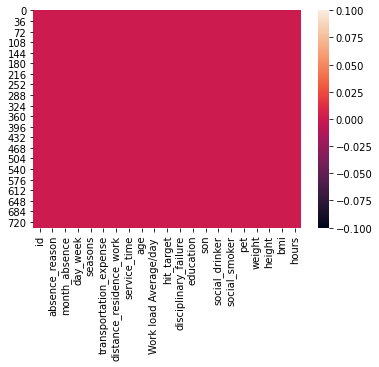

In [9]:
# Visualize the missing values are in dataset 
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

id                         0
absence_reason             0
month_absence              0
day_week                   0
seasons                    0
transportation_expense     0
distance_residence_work    0
service_time               0
age                        0
Work load Average/day      0
hit_target                 0
disciplinary_failure       0
education                  0
son                        0
social_drinker             0
social_smoker              0
pet                        0
weight                     0
height                     0
bmi                        0
hours                      0
dtype: int64

### 'No missing values is confirmed'

# Summary statistics

In [11]:
df.describe()

,id,absence_reason,month_absence,day_week,seasons,transportation_expense,distance_residence_work,service_time,age,Work load Average/day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,bmi,hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


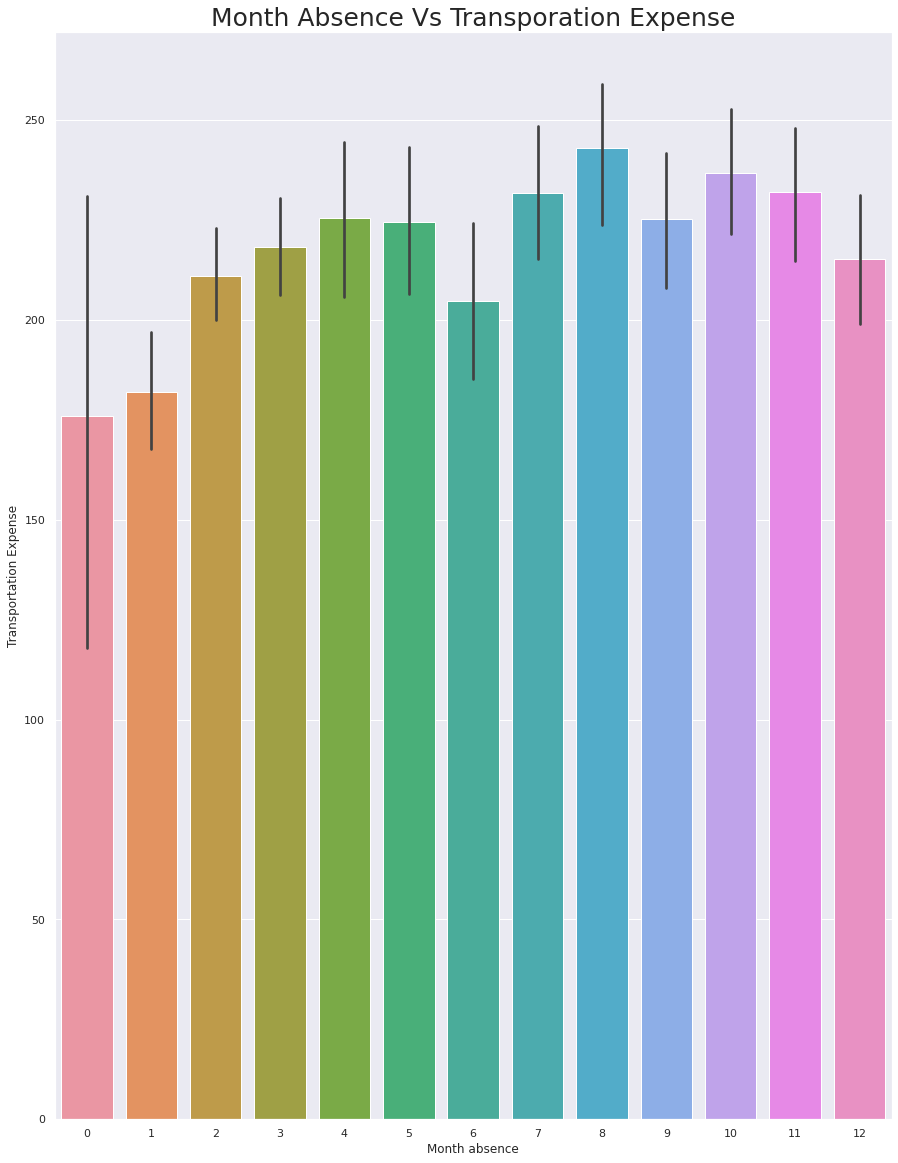

In [12]:
# Making bar plot for Month absence due to transporation expense 
sns.set(rc={'figure.figsize':(15,20)})
sns.barplot(x='month_absence',y='transportation_expense',data=df)
plt.title('Month Absence Vs Transporation Expense',fontsize=25)
plt.xlabel('Month absence')
plt.ylabel('Transportation Expense')
plt.show()

'From above bar plot we can say that largest month of absence was observed in August (8th month) due transporation expense'

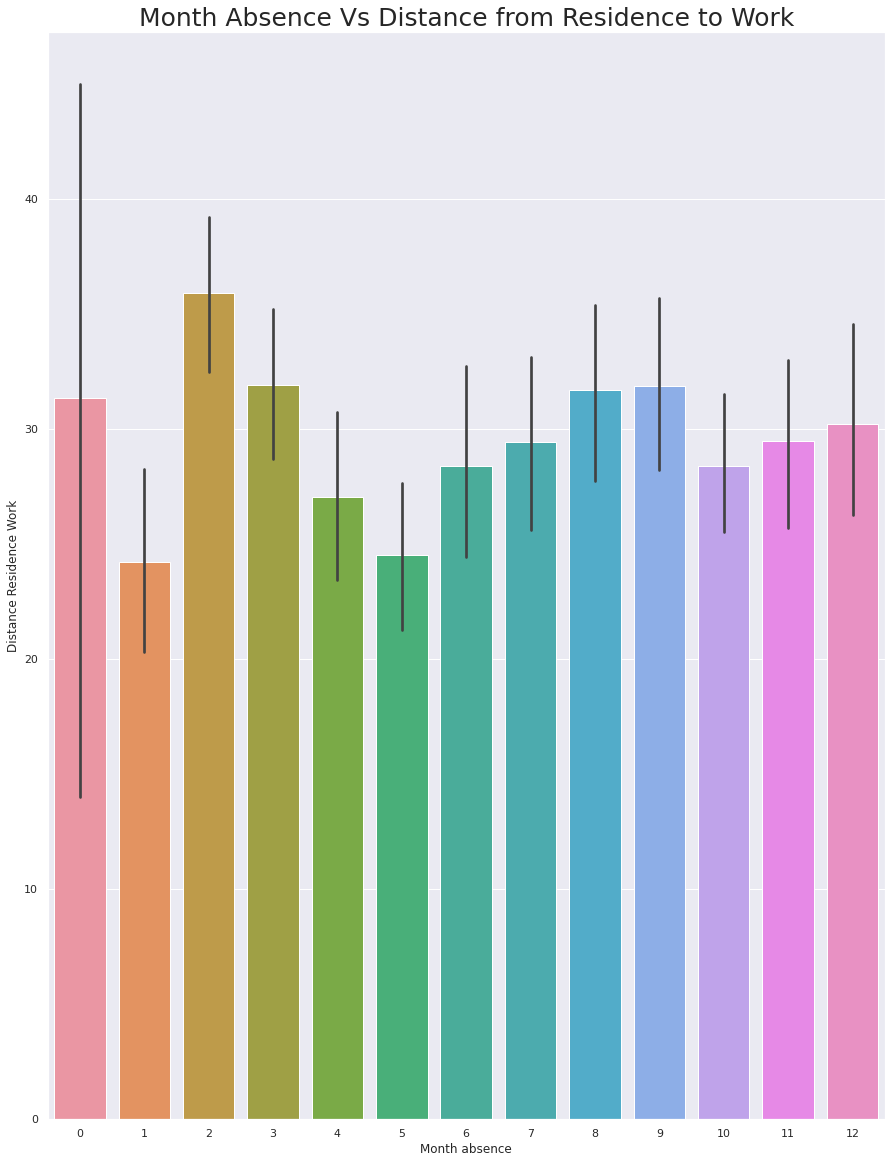

In [13]:
# Making bar plot for Month absence due to distance from residence to work
sns.set(rc={'figure.figsize':(15,20)})
sns.barplot(x='month_absence',y='distance_residence_work',data=df)
plt.title('Month Absence Vs Distance from Residence to Work',fontsize=25)
plt.xlabel('Month absence')
plt.ylabel('Distance Residence Work')
plt.show()

'We can see that it is clear that in Febuary month maximum was observed absent due to distance from residence to work'

,age
education,
1,611
3,79
2,46
4,4


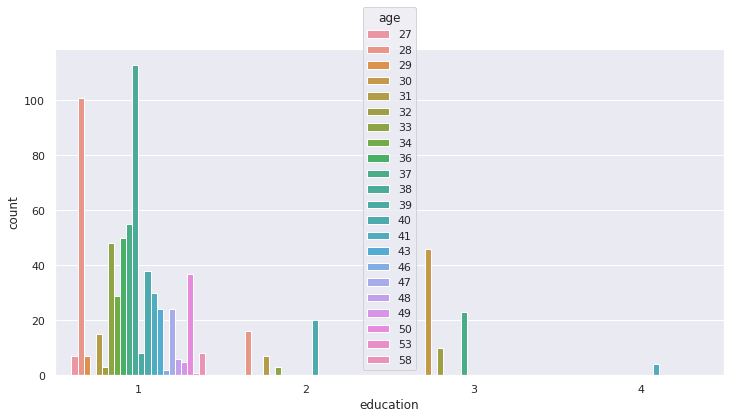

In [14]:
# Count the fraudulent transactions by insured_education_level
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x="education", hue="age", data=df)

# Analyze the fraudulent transactions by insured_education_level
df[["education", "age"]].groupby(['education']).count().sort_values(by="age", ascending=False)

'We can see that age between 27 - 31 have really good education background'

In [15]:
# check the columns
df.columns

Index(['id', 'absence_reason', 'month_absence', 'day_week', 'seasons',
       'transportation_expense', 'distance_residence_work', 'service_time',
       'age', 'Work load Average/day ', 'hit_target', 'disciplinary_failure',
       'education', 'son', 'social_drinker', 'social_smoker', 'pet', 'weight',
       'height', 'bmi', 'hours'],
      dtype='object')

In [16]:
#Transform data types
df['id'] = df['id'].astype('category')

df['absence_reason'] = df['absence_reason'].replace(0,20)
df['absence_reason'] = df['absence_reason'].astype('category')

df['month_absence'] = df['month_absence'].replace(0,np.nan)
df['month_absence'] = df['month_absence'].astype('category')

df['day_week'] = df['day_week'].astype('category')
df['seasons'] = df['seasons'].astype('category')
df['disciplinary_failure'] = df['disciplinary_failure'].astype('category')
df['education'] = df['education'].astype('category')
df['son'] = df['son'].astype('category')
df['social_drinker'] = df['social_drinker'].astype('category')
df['social_smoker'] = df['social_smoker'].astype('category')
df['pet'] = df['pet'].astype('category')

In [17]:
#Make a copy of dataframe
df = df.copy()

In [18]:
# Categorising the variables in two category Continuos and Categorical
continuous_vars = ['distance_residence_work', 'service_time', 'age', 'Work load Average/day ', 'transportation_expense',
       'hit_target', 'weight', 'height', 'bmi', 'hours']

categorical_vars = ['id','absence_reason','month_absence','day_week',
                     'seasons','disciplinary_failure', 'education', 'social_drinker',
                     'social_smoker','pet','son']


In [19]:
# Impute missing vlaues 
print(df['bmi'].iloc[1])

#Set the value of first row in Body mass index as NAN
#create missing value
df['bmi'].iloc[1] = np.nan

31


In [20]:
#Impute with mean

In [21]:
#Apply KNN imputation algorithm
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
df['bmi'].iloc[1]

Imputing row 1/740 with 0 missing, elapsed time: 0.107
Imputing row 101/740 with 0 missing, elapsed time: 0.108
Imputing row 201/740 with 0 missing, elapsed time: 0.108
Imputing row 301/740 with 0 missing, elapsed time: 0.108
Imputing row 401/740 with 0 missing, elapsed time: 0.109
Imputing row 501/740 with 0 missing, elapsed time: 0.109
Imputing row 601/740 with 0 missing, elapsed time: 0.109
Imputing row 701/740 with 0 missing, elapsed time: 0.110


31.00000068333565

In [22]:
#Round the values of categorical values
for i in categorical_vars:
    df.loc[:,i] = df.loc[:,i].round()    
    df.loc[:,i] = df.loc[:,i].astype('category')

In [23]:
#Check if any missing values
df.isnull().sum()

id                         0
absence_reason             0
month_absence              0
day_week                   0
seasons                    0
transportation_expense     0
distance_residence_work    0
service_time               0
age                        0
Work load Average/day      0
hit_target                 0
disciplinary_failure       0
education                  0
son                        0
social_drinker             0
social_smoker              0
pet                        0
weight                     0
height                     0
bmi                        0
hours                      0
dtype: int64

In [24]:
# Data Visualization 

Distribution of data

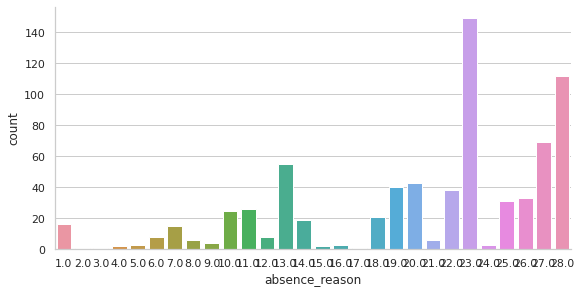

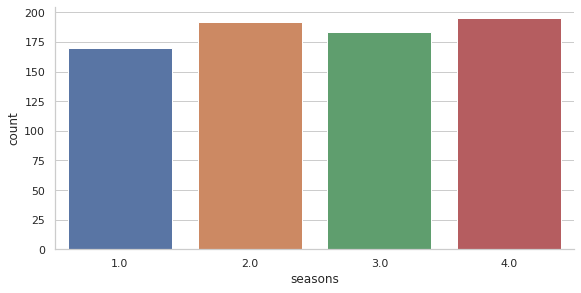

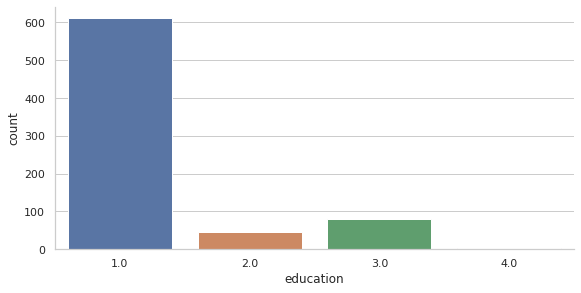

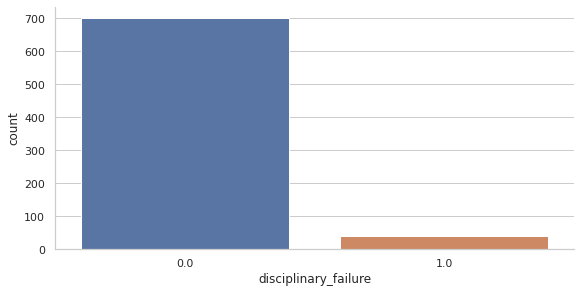

In [25]:
#Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=df, x='absence_reason', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='seasons', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='education', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='disciplinary_failure', kind= 'count',size=4,aspect=2)

#Distribution of weight using histogram

Text(0.5, 1.0, 'Weight Distribution')

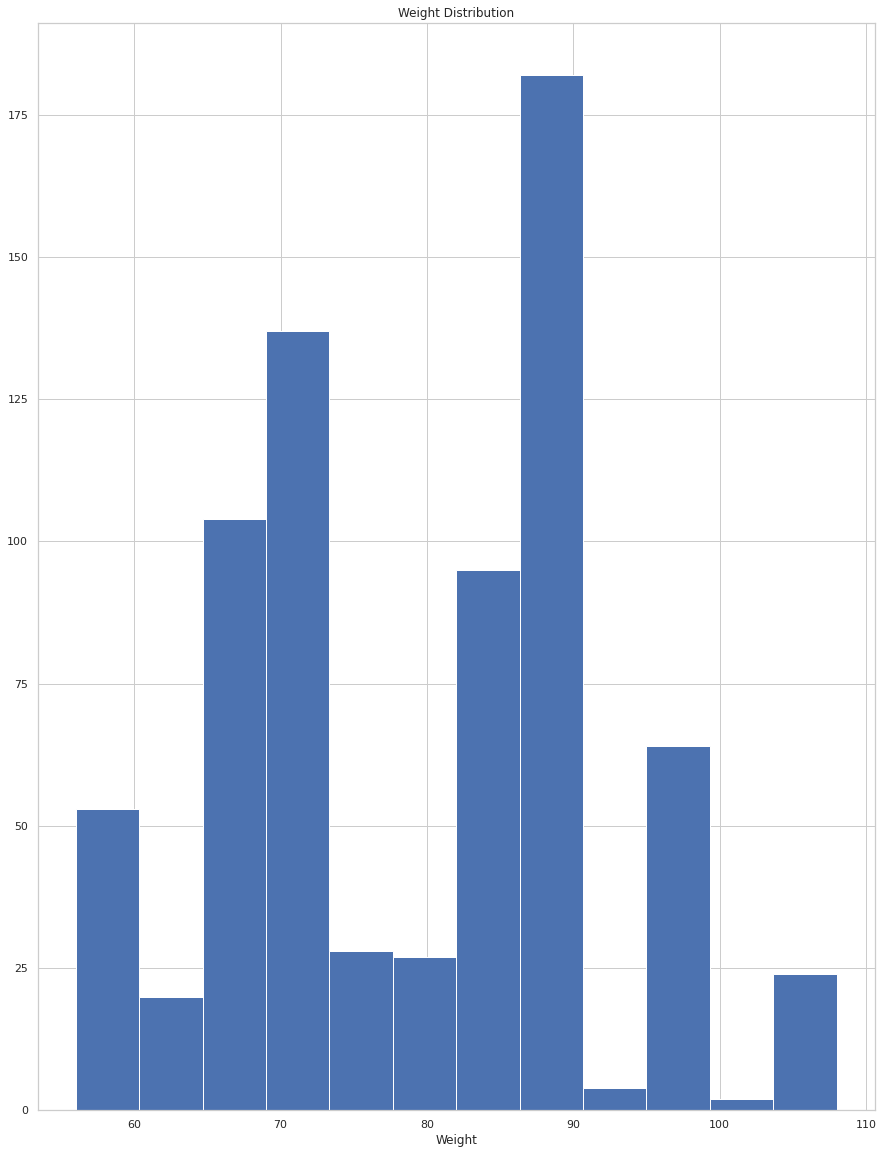

In [26]:
plt.hist(data=df, x='weight', bins='auto', label='Weight')
plt.xlabel('Weight')
plt.title("Weight Distribution")


#Distribution of age using histogram

Text(0.5, 1.0, 'Age Distribution')

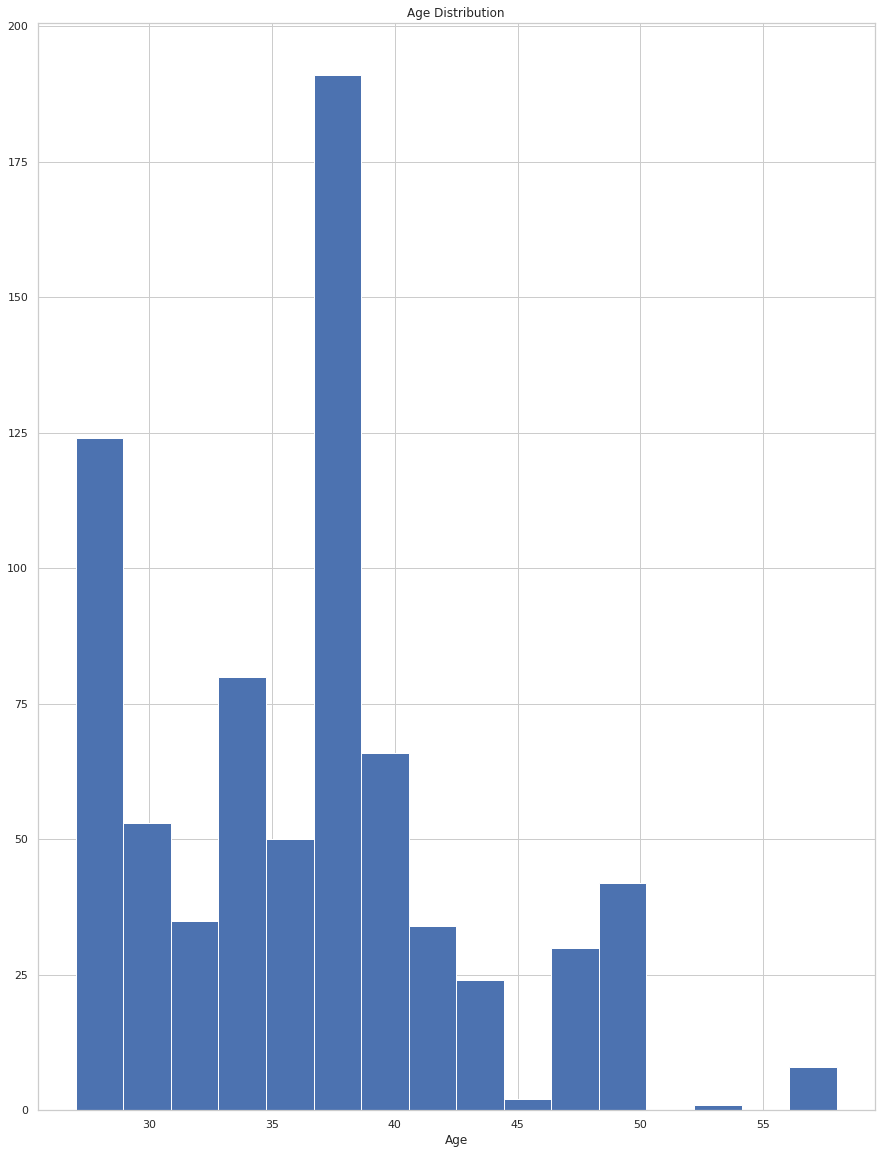

In [27]:
plt.hist(data=df, x='age', bins='auto', label='Age')
plt.xlabel('Age')
plt.title("Age Distribution")

**Check the distribution of Temperature and Humdity against Bike rental count using scatter plot**

Text(0, 0.5, 'Count of bikes')

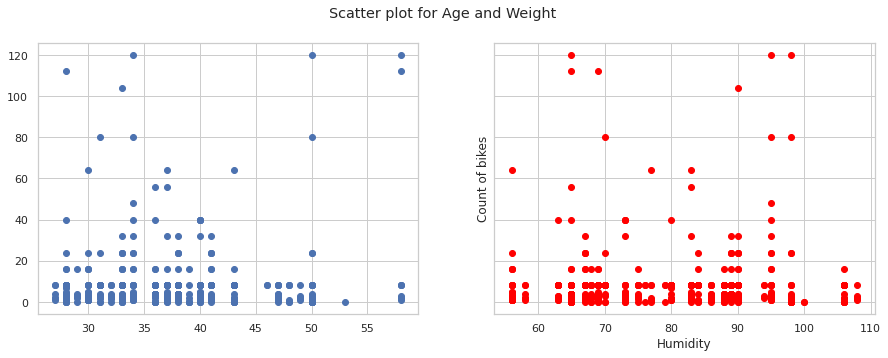

In [28]:
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=True)
axs[0].scatter(data=df, x='age', y='hours')
axs[1].scatter(data=df, x='weight', y='hours', color = 'red')
fig.suptitle('Scatter plot for Age and Weight')
plt.xlabel("Humidity")
plt.ylabel("Count of bikes")

#Check outliers in data using boxplot

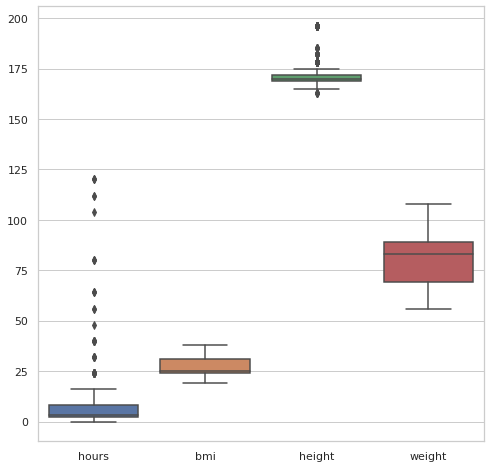

In [29]:
sns.boxplot(data=df[['hours','bmi','height','weight']])
fig=plt.gcf()
fig.set_size_inches(8,8)

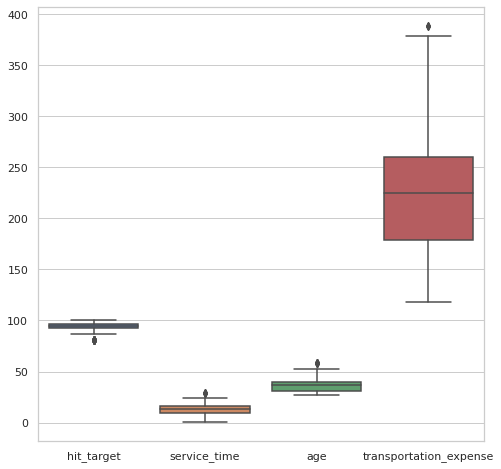

In [30]:
#Check for outliers in data using boxplot
sns.boxplot(data=df[['hit_target','service_time','age','transportation_expense']])
fig=plt.gcf()
fig.set_size_inches(8,8)

**Treating Outliers**

In [31]:
#Check for outliers using boxplots
for i in continuous_vars:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df[i], [75,25])
    
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan


# Impute missing values with KNN
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
# Checking if there is any missing value
df.isnull().sum()

Imputing row 1/740 with 0 missing, elapsed time: 0.114
Imputing row 101/740 with 1 missing, elapsed time: 0.116
Imputing row 201/740 with 0 missing, elapsed time: 0.118
Imputing row 301/740 with 0 missing, elapsed time: 0.120
Imputing row 401/740 with 0 missing, elapsed time: 0.121
Imputing row 501/740 with 0 missing, elapsed time: 0.122
Imputing row 601/740 with 0 missing, elapsed time: 0.123
Imputing row 701/740 with 0 missing, elapsed time: 0.125


id                         0
absence_reason             0
month_absence              0
day_week                   0
seasons                    0
transportation_expense     0
distance_residence_work    0
service_time               0
age                        0
Work load Average/day      0
hit_target                 0
disciplinary_failure       0
education                  0
son                        0
social_drinker             0
social_smoker              0
pet                        0
weight                     0
height                     0
bmi                        0
hours                      0
dtype: int64

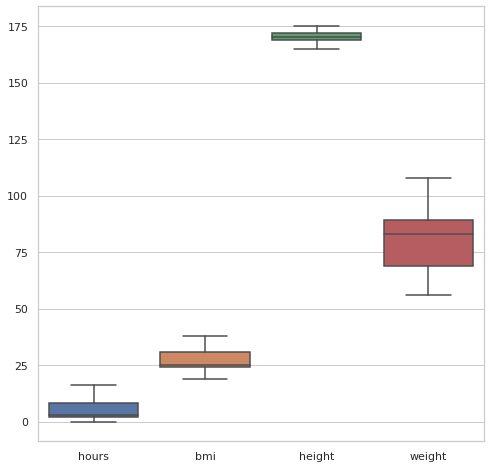

In [32]:
#Check for outliers in data using boxplot
sns.boxplot(data=df[['hours','bmi','height','weight']])
fig=plt.gcf()
fig.set_size_inches(8,8)

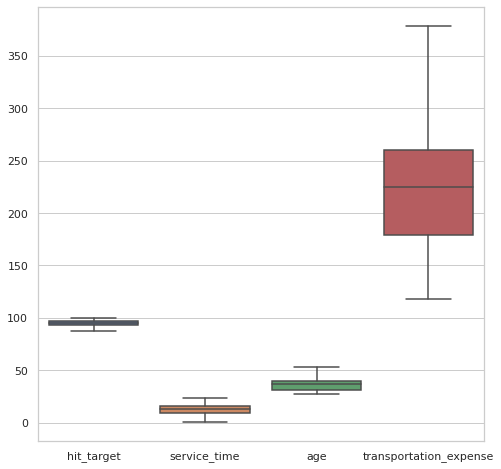

In [33]:
#Check for outliers in data using boxplot
sns.boxplot(data=df[['hit_target','service_time','age','transportation_expense']])
fig=plt.gcf()
fig.set_size_inches(8,8)

**FEATURE SELECTION**

In [34]:
#Get dataframe with all continuous variables
df_corr = df.loc[:,continuous_vars]

[]

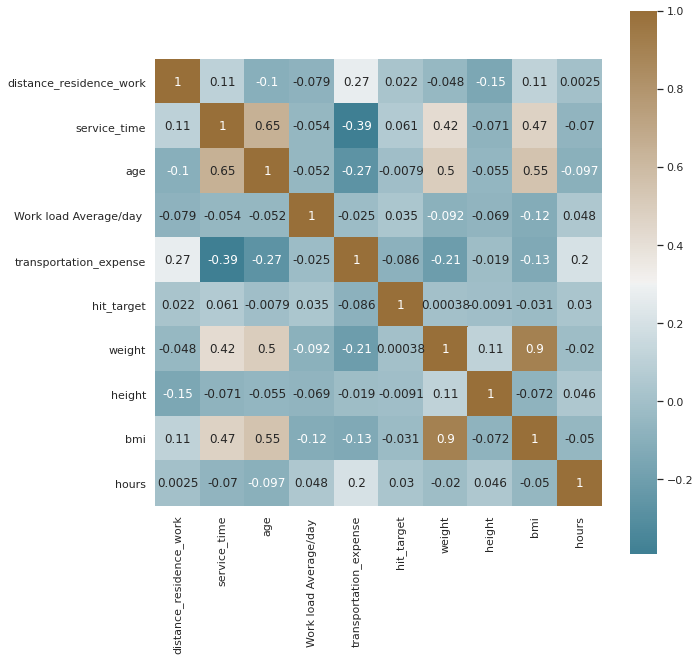

In [35]:
#Check for multicollinearity using corelation graph
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [36]:
#Variable Reduce
to_drop = ['weight']
df = df.drop(to_drop, axis = 1)

In [37]:
# Updating the Continuous and Categorical Variables
continuous_vars.remove('weight')

In [38]:
#Make a copy of clean data and export it as excel file
clean_data = df.copy()

In [39]:
continuous_vars

['distance_residence_work',
 'service_time',
 'age',
 'Work load Average/day ',
 'transportation_expense',
 'hit_target',
 'height',
 'bmi',
 'hours']

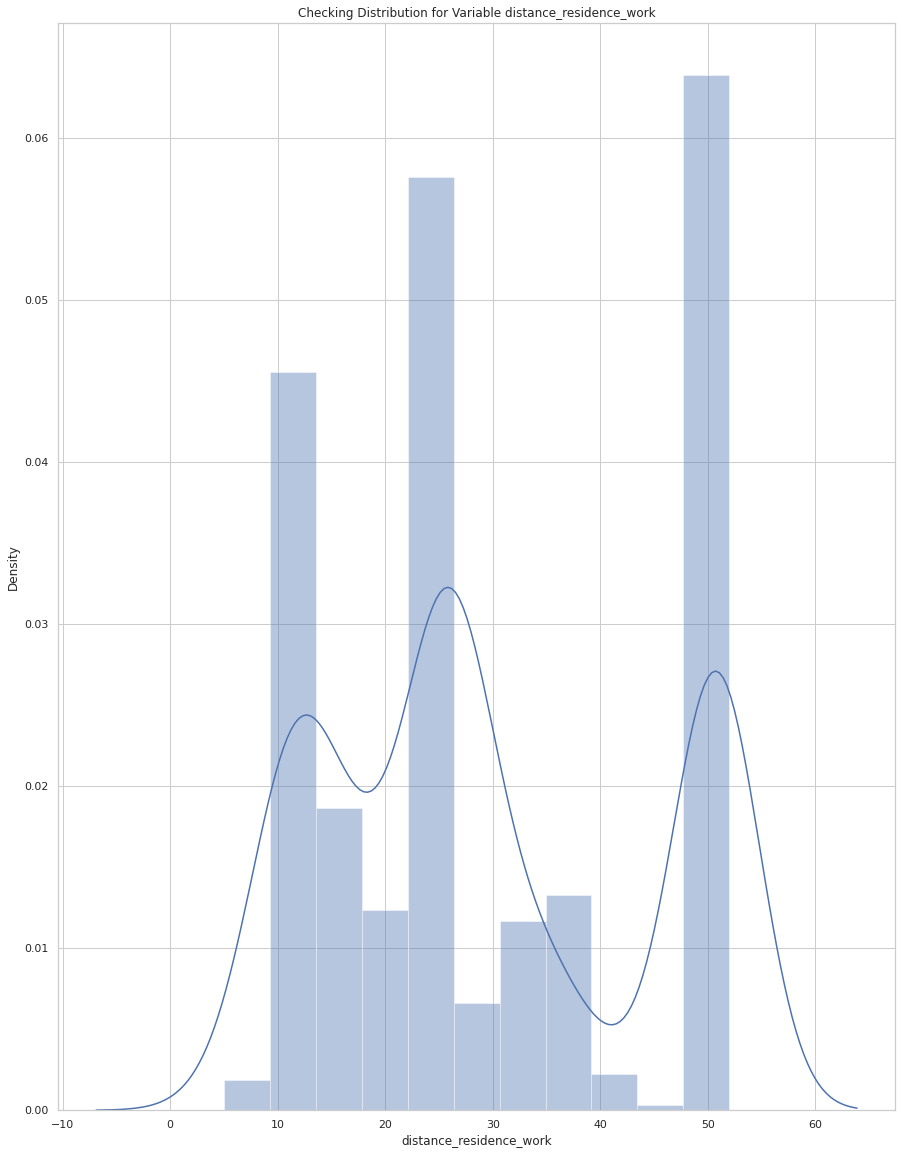

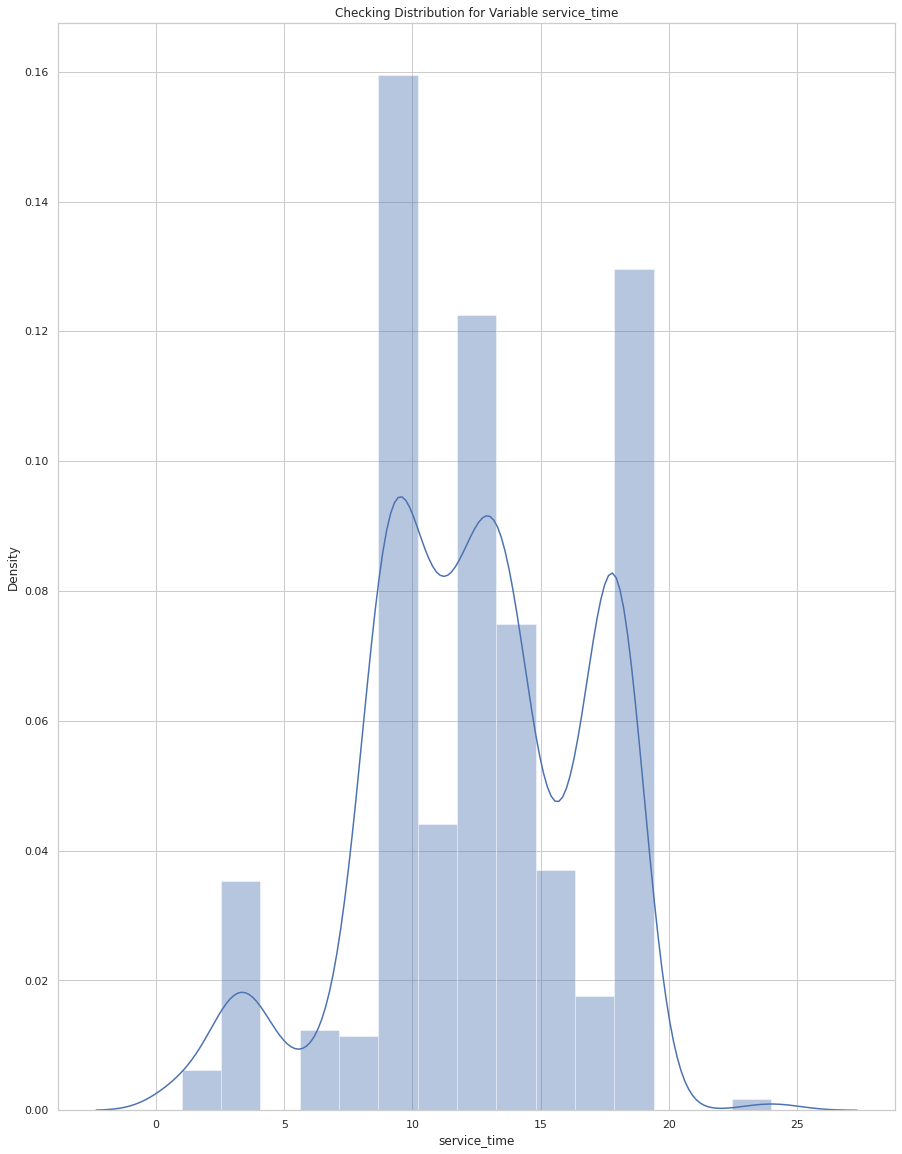

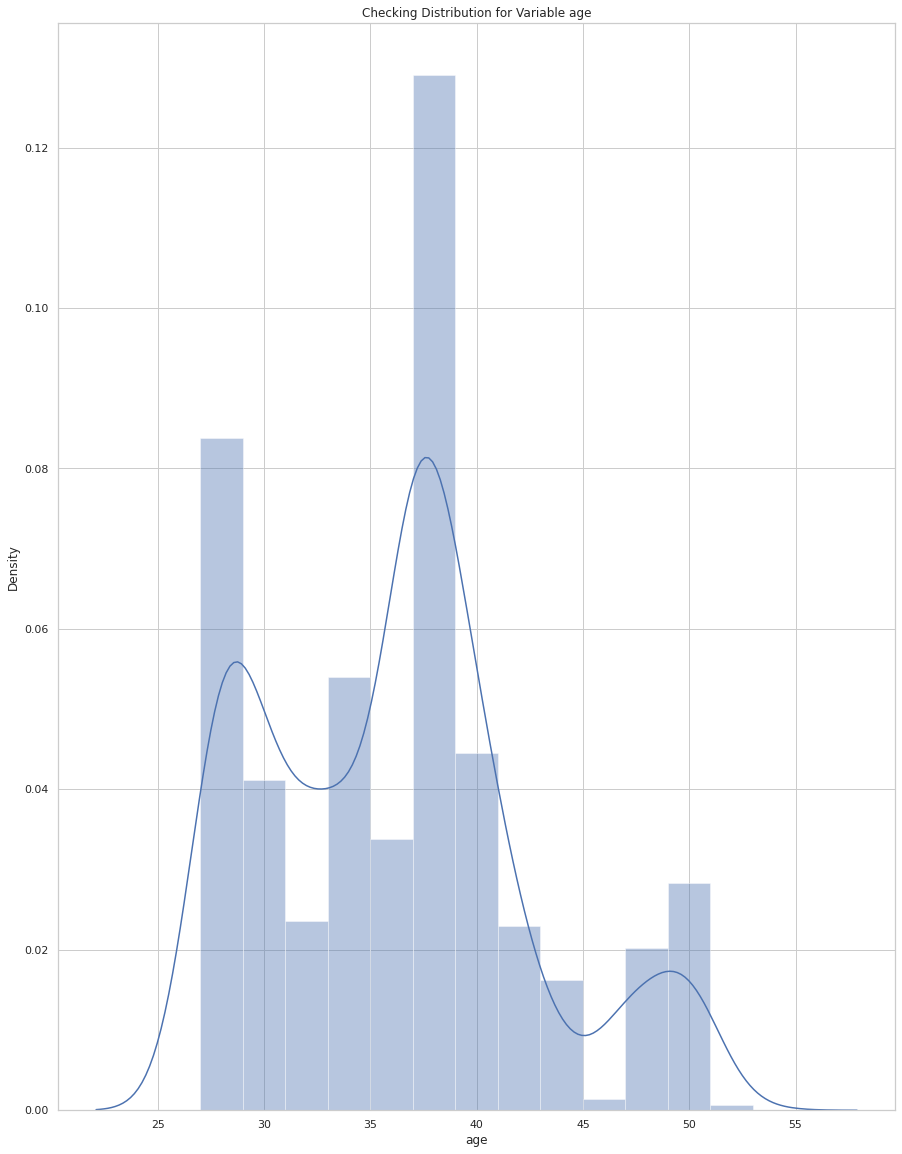

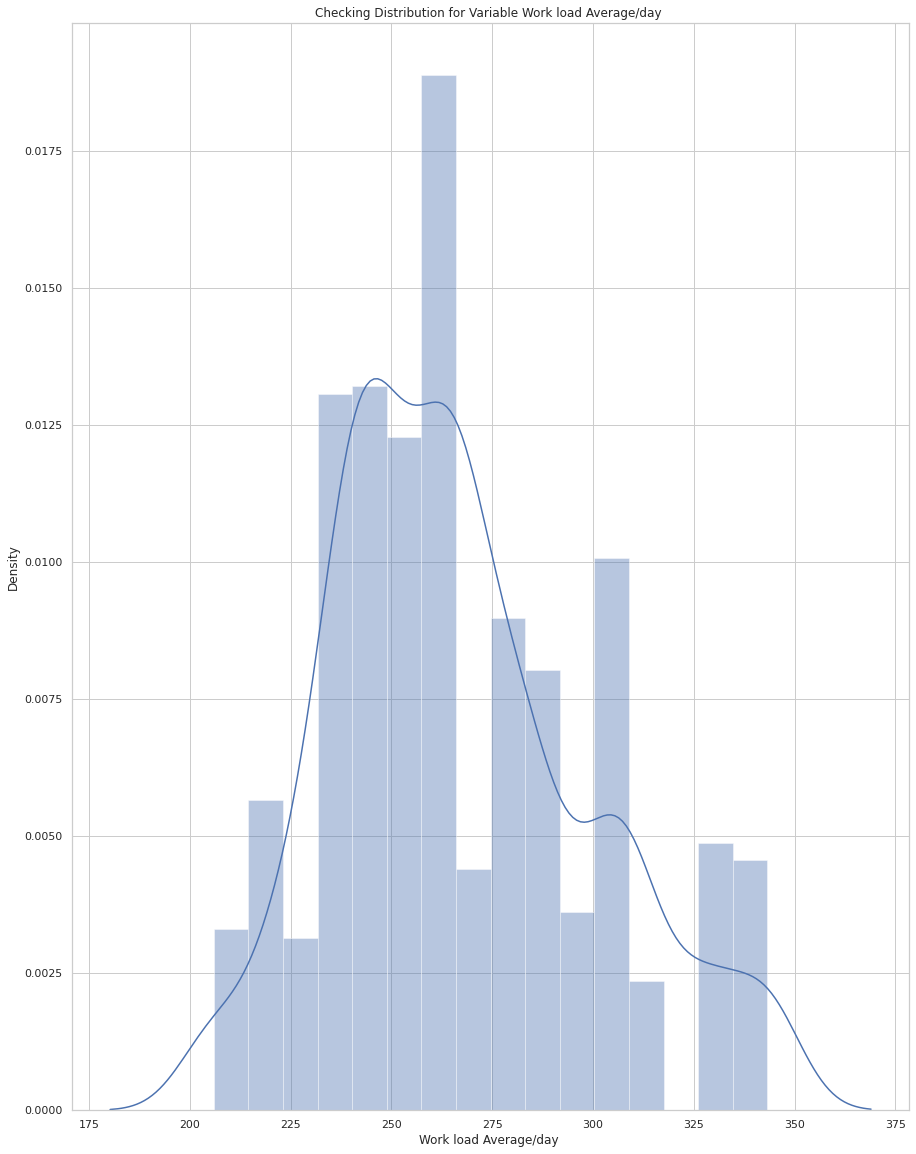

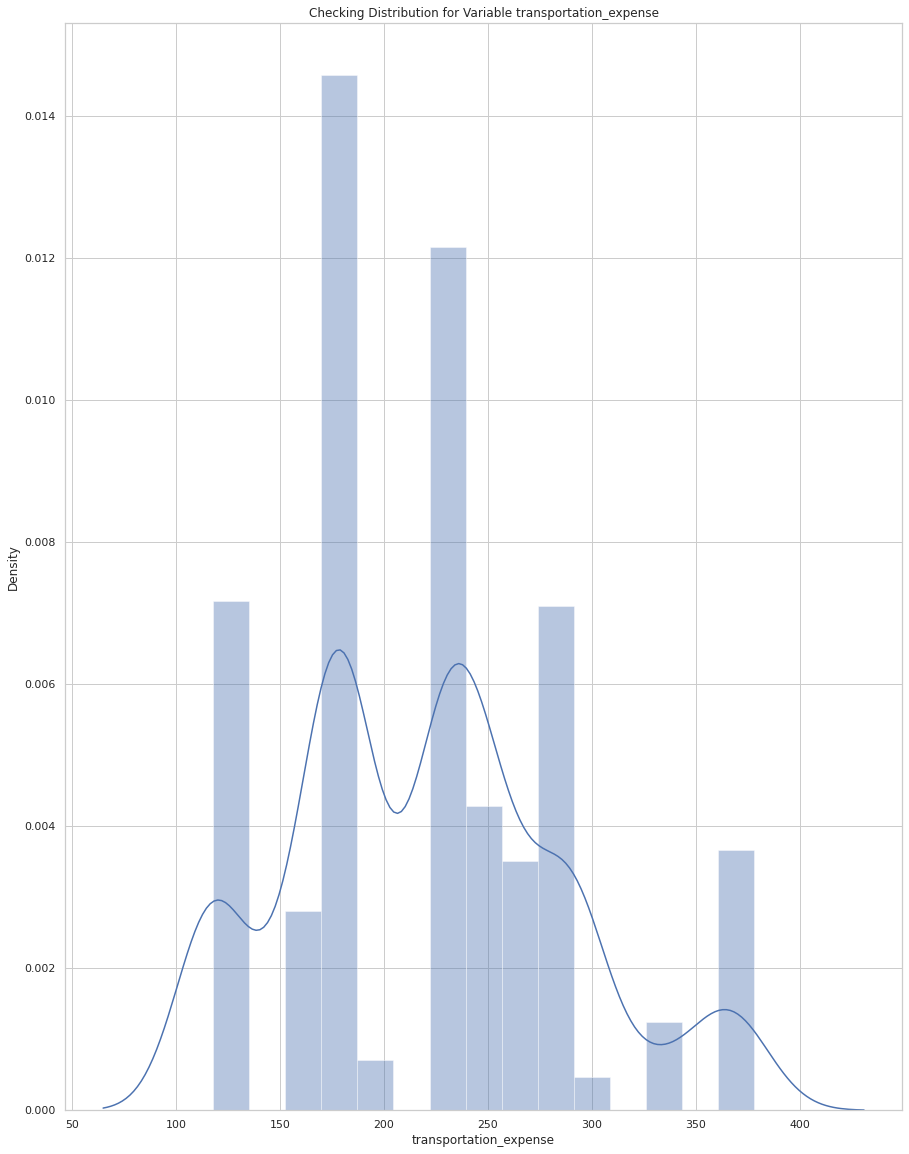

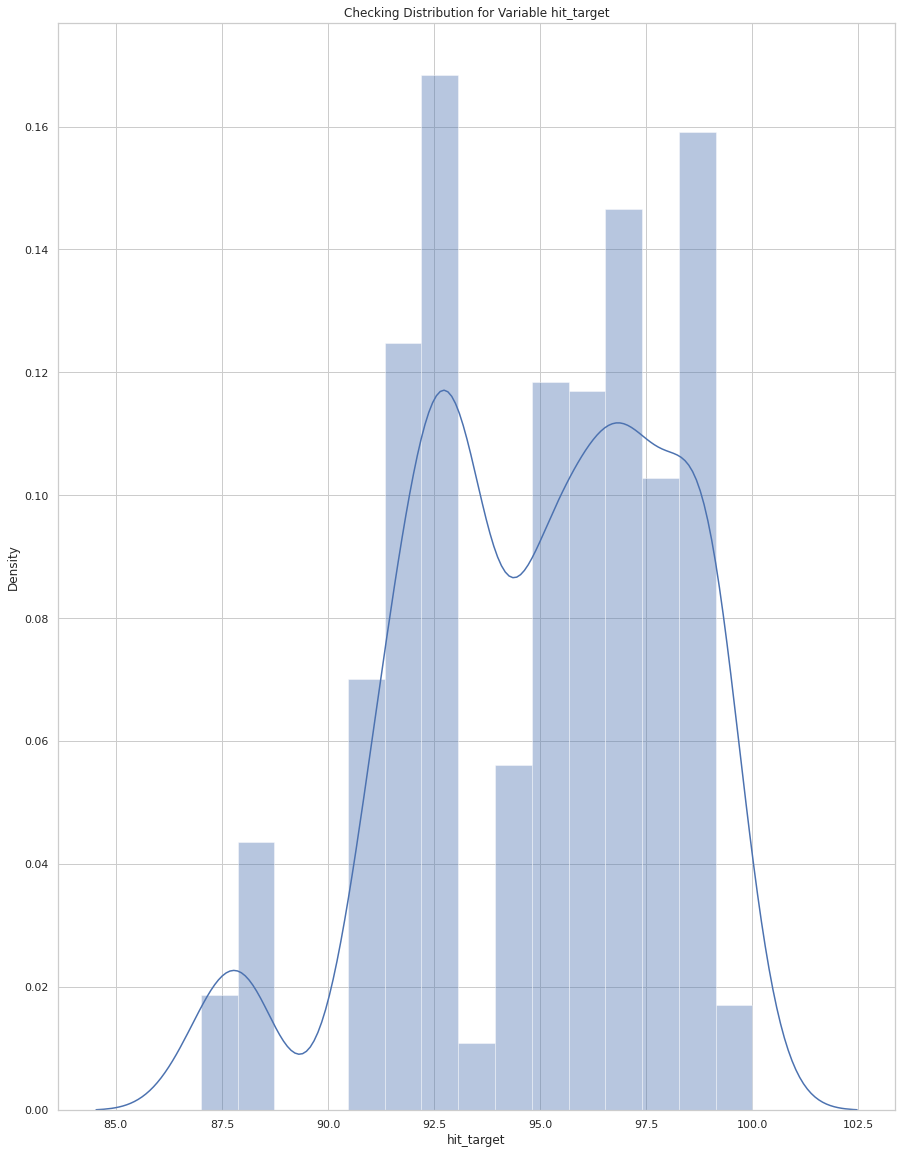

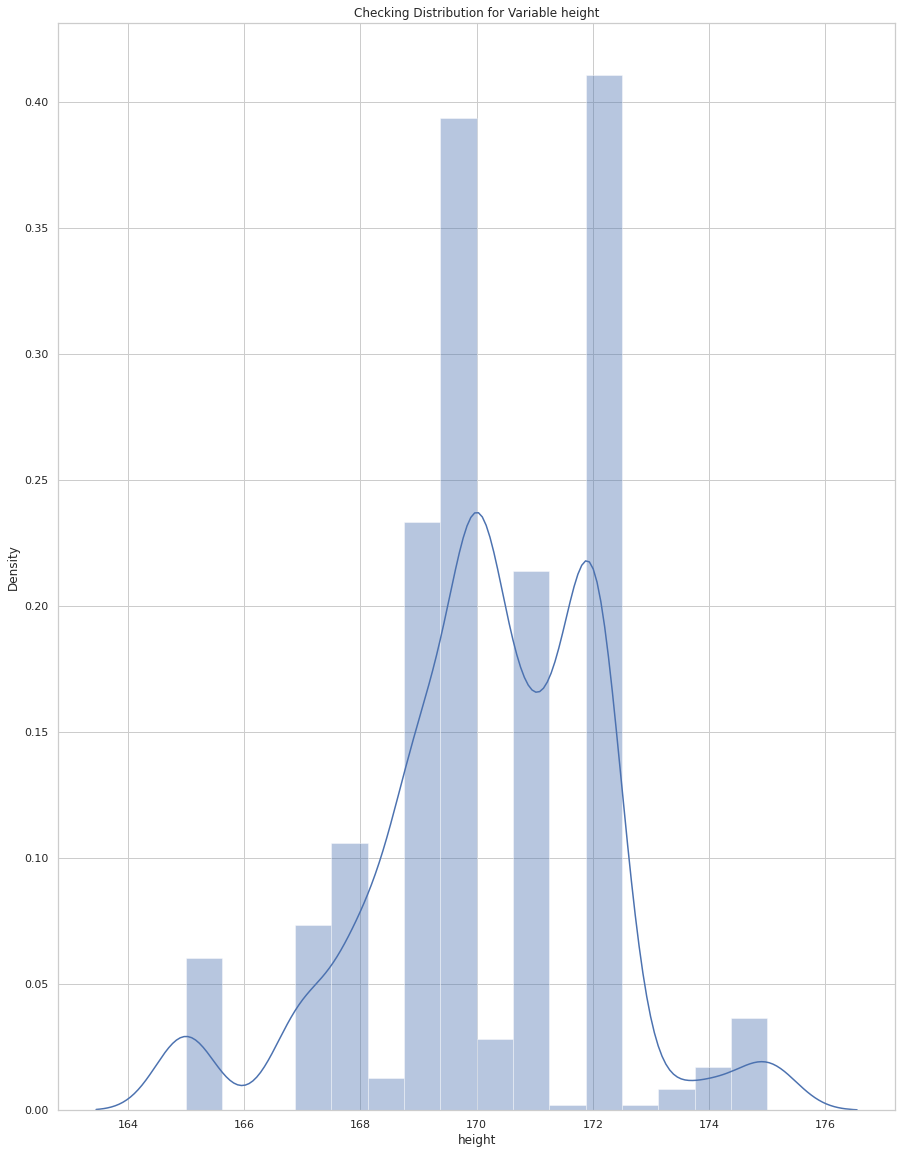

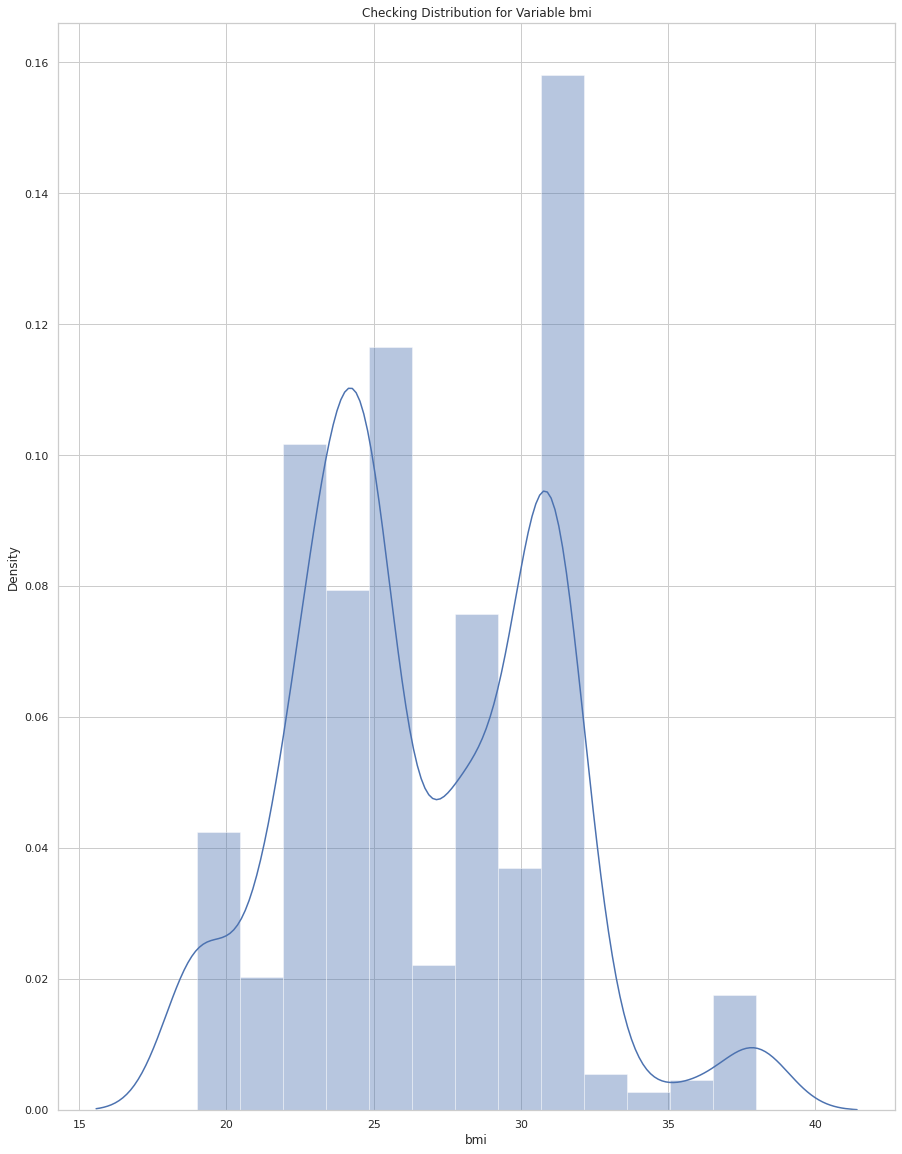

In [40]:
# Scaling 
#Normality check
for i in continuous_vars:
    if i == 'hours':
        continue
    sns.distplot(df[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [41]:
#Normalization of continuous variables
for i in continuous_vars:
    if i == 'hours':
        continue
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

## **MODELS**

In [42]:
#Create dummy variables of factor variables
df = pd.get_dummies(data = df, columns = categorical_vars)

# Copying dataframe
df1 = df.copy()

In [43]:
df.shape

(740, 115)

In [44]:
#Splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, df.columns != 'hours'], df.iloc[:, 8], test_size = 0.20, random_state = 42)

## **RANDOM FOREST**

In [45]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Create data frame for actual and predicted values
df_rf = pd.DataFrame({'actual': y_test, 'pred': rf_predictions})
print(df_rf.head())

#Define function to calculate RMSE
def RMSE(y_actual,y_predicted):
    rmse = np.sqrt(mean_squared_error(y_actual,y_predicted))
    return rmse

#Calculate RMSE and R-squared value
print("RMSE: "+str(RMSE(y_test, rf_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_predictions)))

     actual      pred
120     1.0  2.002667
416     4.0  4.771943
334     8.0  7.938584
350     2.0  4.271995
412     4.0  6.259947
RMSE: 2.5566370235302505
R^2 Score(coefficient of determination) = 0.41366033862389406


## **Decision Tree**

In [46]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor

#Build decsion tree using DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1).fit(X_train,y_train)

#Perdict for test cases
dt_predictions = dt_model.predict(X_test)

#Create data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
print(df_dt.head())

#Calculate RMSE and R-squared value
print("RMSE: "+str(RMSE(y_test, dt_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))

     actual  pred
120     1.0   2.0
416     4.0   2.0
334     8.0   8.0
350     2.0   8.0
412     4.0   8.0
RMSE: 3.705246161648561
R^2 Score(coefficient of determination) = -0.23153073922674805


Linear Regression

In [47]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Train the model
lr_model = LinearRegression().fit(X_train , y_train)

#Perdict for test cases
lr_predictions = lr_model.predict(X_test)

#Create data frame for actual and predicted values
df_lr = pd.DataFrame({'actual': y_test, 'pred': lr_predictions})
print(df_lr.head())

#Calculate RMSE and R-squared value
print("RMSE: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))

     actual     pred
120     1.0  0.87500
416     4.0  6.28125
334     8.0  7.68750
350     2.0  3.84375
412     4.0  2.93750
RMSE: 148399678331.8711
R^2 Score(coefficient of determination) = -1.975500042798632e+21


## **Dimension Reduction using PCA**

In [48]:
#Target variable
target = df['hours']

In [49]:
#Check the dimension
df.shape

(740, 115)

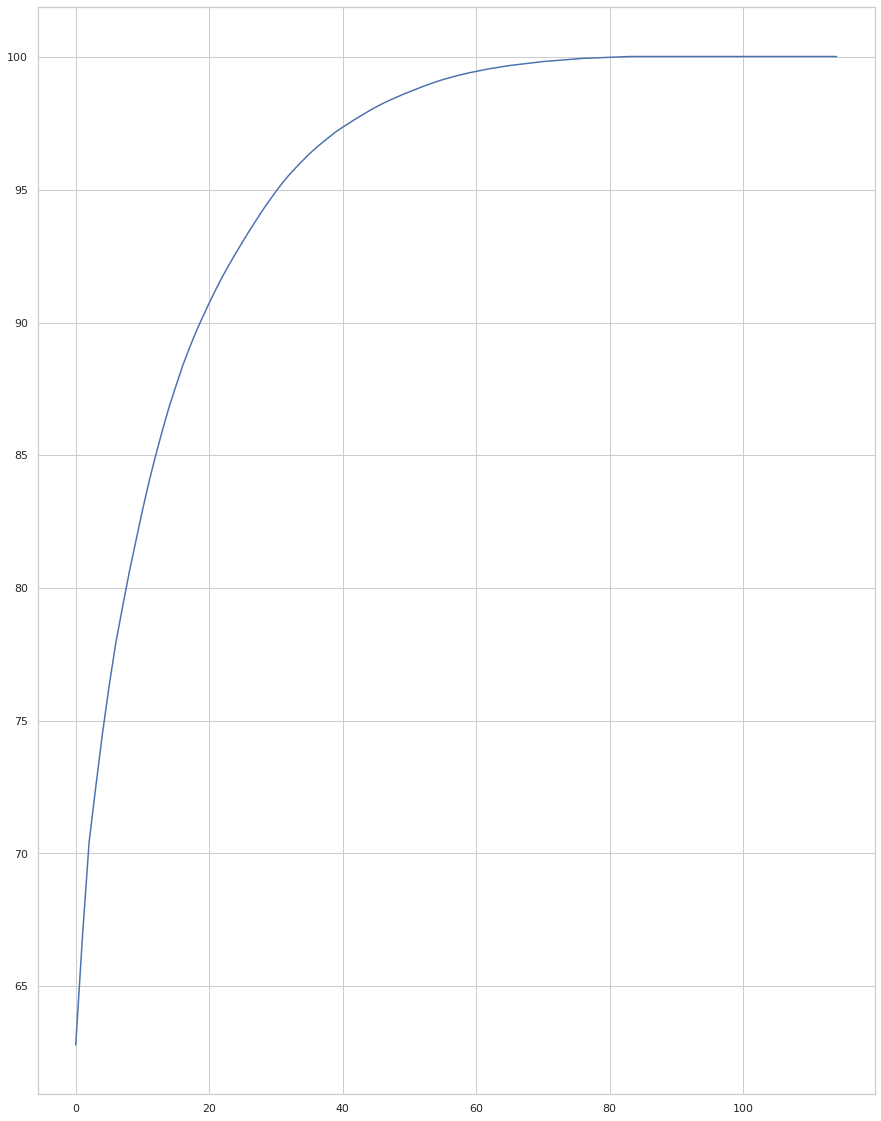

In [50]:
#Import library for PCA
from sklearn.decomposition import PCA

#Converting data to numpy array
X = df.values

#Data has 116 variables so no of components of PCA = 115
pca = PCA(n_components=115)
pca.fit(X)

#Proportion of variance explained
var= pca.explained_variance_ratio_

#Cumulative scree plot
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#Draw the plot
plt.plot(var1)
plt.show()

In [51]:
#Selecting 45 components since it explains almost 95+ % data variance
pca = PCA(n_components=45)

#Fitting the selected components to the data
pca.fit(X)

#Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state = 42)

## **DECISION TREE**

In [52]:
#Build decsion tree using DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1).fit(X_train,y_train)

#Perdict for test cases
dt_predictions = dt_model.predict(X_test)

#Create data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
print(df_dt.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))

     actual  pred
120     1.0   1.0
416     4.0   4.0
334     8.0   8.0
350     2.0   2.0
412     4.0   4.0
Root Mean Squared Error: 0.05952650170128887
R^2 Score(coefficient of determination) = 0.9996821429525246


## **RANDOM FOREST**

In [53]:
#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 42).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Create data frame for actual and predicted values
df_rf = pd.DataFrame({'actual': y_test, 'pred': rf_predictions})
print(df_rf.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, rf_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_predictions)))

     actual      pred
120     1.0  1.000000
416     4.0  4.001934
334     8.0  8.000000
350     2.0  2.000000
412     4.0  4.000000
Root Mean Squared Error: 0.017306297991385767
R^2 Score(coefficient of determination) = 0.9999731329812068


LINEAR REGRESSION

In [54]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Train the model
lr_model = LinearRegression().fit(X_train , y_train)

#Perdict for test cases
lr_predictions = lr_model.predict(X_test)

#Create data frame for actual and predicted values
df_lr = pd.DataFrame({'actual': y_test, 'pred': lr_predictions})
print(df_lr.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))

     actual  pred
120     1.0   1.0
416     4.0   4.0
334     8.0   8.0
350     2.0   2.0
412     4.0   4.0
Root Mean Squared Error: 0.00036189001065298524
R^2 Score(coefficient of determination) = 0.9999999882519898


# **Conclusion**

We can say that clearly that Linear Regression is best model becuase R2 score - 99 % and RMSE - 0.00036. Lower the RMSE values prediction model is good.



In [55]:
# Save the model
import joblib
joblib.dump(lr_model,'absenteeism_work.pkl')

['absenteeism_work.pkl']